### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Check for missing values
missing_values = data.isnull().sum().sort_values()
print("Missing values per column:")
print(missing_values)

Missing values per column:
destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
## Clean up the values for future analysis ##

data.groupby(data['coupon']).sum()

# Clean up the values in Coupon Column
data['coupon'] = data['coupon'].str.replace('(', '')
data['coupon'] = data['coupon'].str.replace(')', '')

## Rename coupon values, normalize the name in according to data columns: RestaurantLess20, Restaurant20to50, CarryAway, CoffeeHouse
data['coupon'] = data['coupon'].str.replace('Restaurant<20', 'RestaurantLess20')
data['coupon'] = data['coupon'].str.replace('Restaurant20-50', 'Restaurant20to50')
data['coupon'] = data['coupon'].str.replace('Carry out & Take away', 'CarryAway')
data['coupon'] = data['coupon'].str.replace('Coffee House', 'CoffeeHouse')

data.groupby(data['coupon']).sum()

## There are various ways we can deal with missing values ##

  # 1: Remove rows with missing values
  # data.dropna(inplace=True)

  # 2: Impute missing values (e.g., using mean)
  # data.fillna(data.mean(), inplace=True)

  # 3: Create a new feature to encode missingness
  # data['missing_feature'] = data.isnull().any(axis=1).astype(int)

# Considering the volume of data in some category is alot, especially column car

# Let's Impute missing values with average (e.g., using mean)
data.fillna(data.mean(), inplace=True)


C:\Users\ramne\AppData\Local\Temp/ipykernel_11432/3953833359.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coupon'] = data['coupon'].str.replace('(', '')
C:\Users\ramne\AppData\Local\Temp/ipykernel_11432/3953833359.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coupon'] = data['coupon'].str.replace(')', '')
C:\Users\ramne\AppData\Local\Temp/ipykernel_11432/3953833359.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [6]:
# Total observations (N): The total number of instances in the dataset.
# Accepted coupon (A)   : The number of instances where the coupon was accepted.

# The proportion of accepted coupons can be expressed as:
# Proportion of accepted coupons = A / N

data.rename(columns = {'Y':'couponaccepted'}, inplace = True)

# Calculate the proportion of accepted coupons
total_observations = len(data)
accepted_coupons = data['couponaccepted'].sum()
proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of accepted coupons: {proportion_accepted:.2%}")


Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

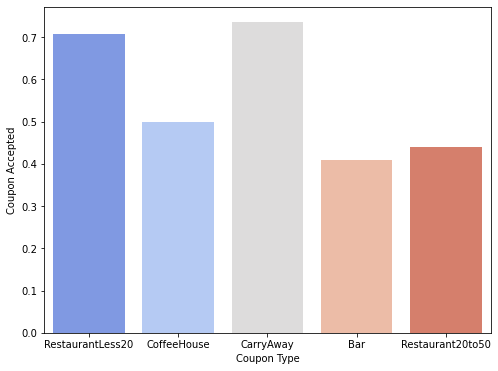

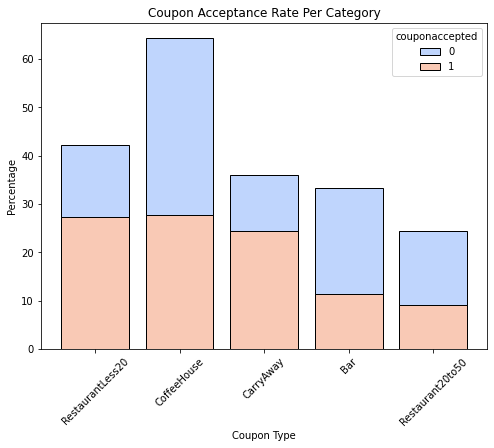

In [7]:
# Basic bar chart

# using sns i.e seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='coupon', y='couponaccepted', data=data, ci=None, palette='coolwarm')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Accepted')
plt.show()

#------------------------------------------------------------------------------------------------#


# Create a colored histogram with sorted coupon types and acceptance values
plt.figure(figsize=(8, 6))
g = sns.histplot(data=data, x='coupon', hue='couponaccepted',  palette='coolwarm',shrink=0.8,multiple='stack', stat='percent', common_norm=False)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Percentage')
plt.title('Coupon Acceptance Rate Per Category')

# Show the plot
plt.show()


6. Use a histogram to visualize the temperature column.

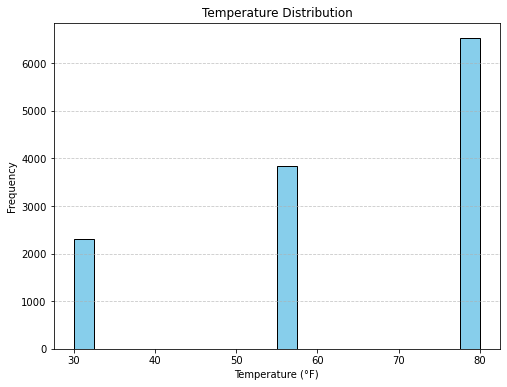

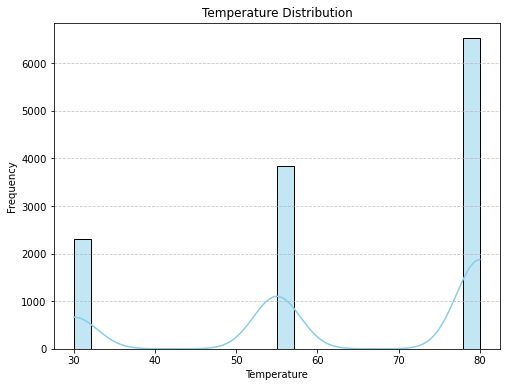

In [8]:
# using plotly
# Create a histogram for the 'Temperature' column
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# using SNS i.e. seaborn

# Create a histogram for the 'temperature' column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='temperature', bins='auto', color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

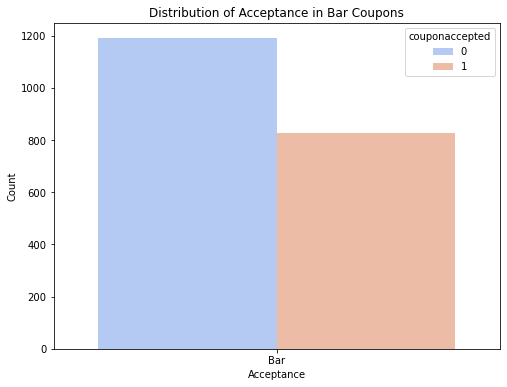

In [9]:
# Create a new DataFrame with only the rows where the coupon is 'bar'
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()

# View the new DataFrame
print(bar_coupons_df)

plt.figure(figsize=(8, 6))

# Create a bar plot to visualize the distribution of acceptance values in 'Bar' coupons
sns.countplot(x='coupon', data=bar_coupons_df,  palette='coolwarm', hue='couponaccepted')

# Add labels and title
plt.xlabel('Acceptance')
plt.ylabel('Count')
plt.title('Distribution of Acceptance in Bar Coupons')

# Show the plot
plt.show()

2. What proportion of bar coupons were accepted?


In [10]:
# Calculate the proportion of accepted bar coupons

total_bar_coupons = len(bar_coupons_df)
total_bar_coupons

accepted_bar_coupons = bar_coupons_df['couponaccepted'].sum()
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons

print(f"Proportion of accepted bar coupons: {proportion_accepted_bar_coupons:.2%}")

Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

bar_coupons_df['Y']


In [11]:
#data.columns
# 'destination', 'passanger', 'weather', 'temperature', 'time', 'coupon','expiration','gender', 'age', 'maritalStatus', 
# 'has_children','education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 
# 'Restaurant20To50','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min','direction_same', 'direction_opp', 'Y'

def replaceColumnMapping(data, column_name):
    replacement_mapping = {
        '4~8': 6,
        '1~3': 2,
        'never': 0,
        'less1': 1,
        'gt8': 9
    }

    data[column_name] = data[column_name].replace(replacement_mapping)

# Apply the replace
replaceColumnMapping(bar_coupons_df, 'Bar')

# Apply the replace
replaceColumnMapping(data, 'Bar')

# Replace NaN values with 0 in the specified columns
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].fillna(0)

# Convert columns to numeric type
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].apply(pd.to_numeric, errors='coerce')

# Create two DataFrames: one for <=3 bar visits and one for >3 bar visits
bar_coupons_df.groupby(data['Bar']).sum()

bar_3_or_fewer_df = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
bar_more_than_3_df = bar_coupons_df[bar_coupons_df['Bar'] > 3]

#bar_3_or_fewer_df.groupby(bar_3_or_fewer_df['Bar']).sum()
#bar_more_than_3_df.groupby(bar_more_than_3_df['Bar']).sum()

# Calculate acceptance rates for each group
acceptance_rate_3_or_fewer = bar_3_or_fewer_df['couponaccepted'].mean()
acceptance_rate_more_than_3 = bar_more_than_3_df['couponaccepted'].mean()

print(f"Acceptance rate for 3 or fewer bar visits: {acceptance_rate_3_or_fewer:.2%}")
print(f"Acceptance rate for more than 3 bar visits: {acceptance_rate_more_than_3:.2%}")


Acceptance rate for 3 or fewer bar visits: 37.07%
Acceptance rate for more than 3 bar visits: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
data.groupby(data['Bar']).sum()

morethan1_above25 = data[(data['Bar'] > 1) & (data['age'] > '25')]
other = data[~(data['Bar'] > 1) & ~(data['age'] > '25')] 

# Calculate acceptance rates for each group
acceptance_rate_morethan1_above25 = morethan1_above25['couponaccepted'].mean()
acceptance_rate_other = other['couponaccepted'].mean()

print(f"Acceptance rate for Drivers who go to bar more than Once and > 25 : {acceptance_rate_morethan1_above25:.2%}")
print(f"Acceptance rate for Rest: {acceptance_rate_other:.2%}")


Acceptance rate for Drivers who go to bar more than Once and > 25 : 62.14%
Acceptance rate for Rest: 58.11%


In [13]:
#Analysis : yes 
# drivers who go to a bar more than once a month and are > 25 years of age are little higher in percentage i.e. 62.14% than
# rest of the drivers which are 58.11%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [14]:
data.groupby(data['passanger']).sum()


morethan1_nokid_nooccupfff = data[(data['Bar'] > 1) & (data['passanger'] != 'kid') & ~data['occupation'].isin(['farming', 'fishing', 'forestry'])]

# Calculate acceptance rates for each group
acceptance_rate_morethan1_nokid_nooccupfff = morethan1_nokid_nooccupfff['couponaccepted'].mean()

print(f"Acceptance rate of coupons for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : {acceptance_rate_morethan1_nokid_nooccupfff:.2%}")


Acceptance rate of coupons for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : 62.21%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [15]:
# Create three DataFrames for each group


morethan1_nokid_notwidow_df = data[(data['Bar'] > 1) & (data['passanger'] != 'kid') & (data['maritalStatus'] != 'widowed')]
morethan1_under30_df = data[(data['Bar'] > 1) & (data['age'] < '30')]
resta20to40_incless50k_df = data[(data['Restaurant20To50'] > '4') & (data['income'] < '50000')]

# Calculate acceptance rates for each group
acceptance_rate_morethan1_nokid_notwidow_df = morethan1_nokid_notwidow_df['couponaccepted'].mean()
acceptance_rate_morethan1_under30_df = morethan1_under30_df['couponaccepted'].mean()
acceptance_rate_20to40resta_incless50k_df = resta20to40_incless50k_df['couponaccepted'].mean()

print(f"Acceptance rate for Group 1: {acceptance_rate_morethan1_nokid_notwidow_df:.2%}")
print(f"Acceptance rate for Group 2: {acceptance_rate_morethan1_under30_df:.2%}")
print(f"Acceptance rate for Group 3: {acceptance_rate_20to40resta_incless50k_df:.2%}")

Acceptance rate for Group 1: 62.21%
Acceptance rate for Group 2: 62.85%
Acceptance rate for Group 3: 55.62%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [16]:
# Hypothesis 
# Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:
# The acceptance rate for this group is approximately 62.21%.

# Drivers who go to bars more than once a month and are under the age of 30:
# The acceptance rate for this group is approximately 62.85%.

# Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K:
# The acceptance rate for this group is approximately 55.62%.

#Result : Interestingly, the demonstrated track record of going to bars seems to be more predictive of 
#         accepting bar coupons compared to other factors, especially age group which who is younger (less than 30 years) or 
#         drivers with no kids and are not widowed

In [17]:
# Explore the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   108 non-null    object 
 15  Bar                

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
# I choose to explore “Coffee Lovers’" who will use coupons 

data.groupby(data['coupon']).sum()

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Explore characteristics of passengers who accept coffee coupons
coffee_lovers = df[df["coupon"] == "CoffeeHouse"]
           

# Scenario 1: Early Birds
early_birds = coffee_lovers[(coffee_lovers["time"] >= "6AM") & (coffee_lovers["time"] <= "8AM")]

# Print the results
print("Scenario 1: Early Birds")
print(early_birds[["passanger", "time"]])


Scenario 1: Early Birds
       passanger time
12        Kid(s)  6PM
15         Alone  6PM
16         Alone  7AM
21         Alone  7AM
30     Friend(s)  6PM
...          ...  ...
12586      Alone  7AM
12608      Alone  7AM
12631      Alone  7AM
12659      Alone  7AM
12681      Alone  7AM

[2006 rows x 2 columns]


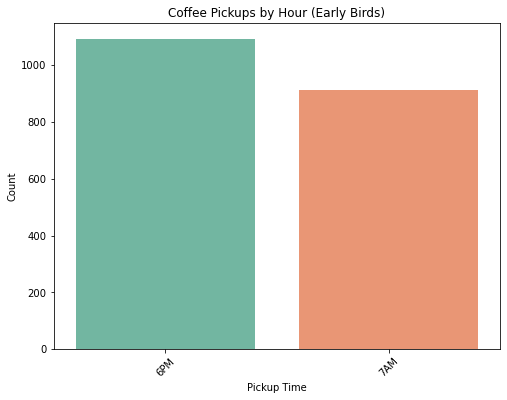

In [19]:
# Create a countplot for coffee pickups by hour
plt.figure(figsize=(8, 6))
sns.countplot(data=early_birds, x="time", palette="Set2")
plt.title("Coffee Pickups by Hour (Early Birds)")
plt.xlabel("Pickup Time")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Analysis 1 :  6 Pm and 7 AM are most favorible times for drivers to pick coffee,
#so those two times will highly likey the coupons will be used most

In [21]:
# Scenario 2: Coffee Lover among genders
df_gender = coffee_lovers.groupby("gender")


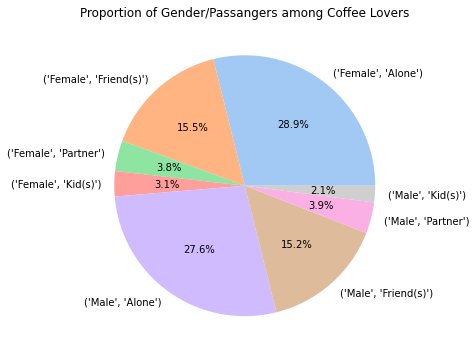

In [22]:
# Coffee Lover among genders and distribution along with passangers

plt.figure(figsize=(6, 6))
passanger_counts = df_gender["passanger"].value_counts().dropna()
plt.pie(passanger_counts, labels=passanger_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Proportion of Gender/Passangers among Coffee Lovers")
plt.show()

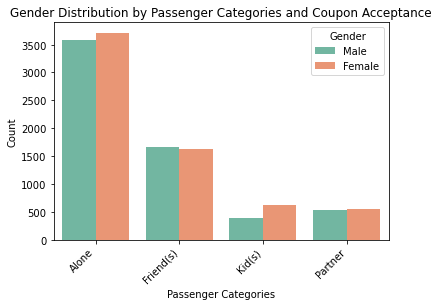

In [23]:
# Countplot for gender distribution with coupon acceptance
sns.countplot(x='passanger', data=data, palette='Set2', hue_order=['Male', 'Female'], hue='gender')

# Set plot details
plt.title("Gender Distribution by Passenger Categories and Coupon Acceptance")
plt.xlabel('Passenger Categories')
plt.ylabel('Count')

# Improve readability of x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Gender')

# Show the plot
plt.show()

In [24]:
#Analysis 2:
# 1. Both Male and female who drive alone, will tend to pick coffee and will tend to use coupons
# 2. Both Male and females when driving with friends has a probability of picking coffee to be 15% and will second highly likely to use coupons
# 3 Drivers with their partners or kids tend to pick coffee least and most probably will not use coupons 


In [25]:
#Next details and recommendations:
# Compnay should target different audience to collect across different genders , especially who drive with partners

# Additional Variables:
 
  # Location Impact Analysis: Investigate how coupon acceptance rates vary across different regions. Consider factors like local demographics, economic conditions, and cultural preferences. Analyze data to identify patterns and tailor coupon offerings accordingly.
  # Time-Based Analysis: Examine acceptance rates based on the time of day or day of the week. Are there specific hours or days when users are more likely to redeem coupons? Adjust your timing strategies accordingly.

# Machine Learning Models:
 
 # Data Splitting: Divide your dataset into training and testing sets. This allows you to build and evaluate machine learning models effectively.
 # Algorithm Selection: Explore algorithms such as logistic regression, decision trees, or ensemble methods. Train these models on the training data and evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

#Segmentation Analysis:

 # Clustering Algorithms: Utilize clustering techniques (e.g., k-means) to segment your user base. Identify meaningful groups based on driver-passenger behavior, preferences, or demographics. Customize marketing strategies for each segment.

# Feedback Mechanism:

 # User Opinions: Implement a feedback form or rating system within your app. Collect qualitative feedback from users regarding coupon offerings. Use this information to identify areas for improvement and gain insights into user preferences.

# Dynamic Coupon Strategy:

 # Real-Time Factors: Develop a dynamic pricing model for coupons. Consider real-time factors such as weather conditions, local events, or demand fluctuations. Machine learning models can predict optimal coupon values based on these factors.

# Collaborations and Partnerships:

 # Local Business Collaborations: Partner with local businesses or events. Create joint promotions that benefit both parties. Cross-promote coupons to increase visibility and attract a wider audience.

#User Engagement Campaigns:
 
 # Education Campaigns: Launch targeted campaigns to educate users about the benefits of accepting and using coupons. Highlight cost savings, exclusive discounts, and other incentives.
 # Loyalty Points: Offer additional rewards, such as loyalty points, to encourage consistent coupon acceptance.

# A/B Testing:
 # Experimentation: Design A/B tests with variations in coupon elements. Test different features (e.g., discount percentages, expiration dates, visuals) and measure their impact on acceptance rates. Use data-driven insights to refine your coupon design.

# Continuous Monitoring:
 # KPI Tracking: Set up a monitoring system to track key performance indicators (KPIs) related to coupon acceptance. Regularly review metrics such as redemption rates, user engagement, and revenue generated through coupons.